In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.grid import *

# numpy float 見づらいので調整する
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

%matplotlib inline

# SARSA

status -> action -> reward -> status -> actionでSARSA

$Q(S_t, A_t) \gets (1 - \alpha)Q(S_t, A_t) + \alpha(R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}))$

$\alpha$は学習率です.

式変形

$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha(R_{t+1} + \gamma (S_{t+1}, A_{t+1}) - Q(S_t, A_t))$

$R_{t+1} + \gamma (S_{t+1}, A_{t+1}) - Q(S_t, A_t)$ <- TD誤差

収束すればゼロになる。収束からの離れ具合といえる

適当に実装してみる

In [196]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化
q_table

array([[ 10.,  10.],
       [ 10.,  10.],
       [ 10.,  10.],
       [ 10.,  10.]])

In [514]:
lr = 0.01  # learning rate 学習率

In [536]:
state = 0
action = 0
gamma = 0.8

next_state = 2
next_action = 0
# update式
(1 - lr) * q_table[state, action] + lr * (r(state, action) + gamma * q_table[next_state, next_action])

9.9800000000000004

In [537]:
def r(state, action, next_state=None):
    return grid_reward[state][action]


def update(state, action, next_state, next_action):
    global q_table
    q_table[state, action] = (1 - lr) * q_table[state, action] + lr * (r(state, action) + gamma * q_table[next_state, next_action])
    
    # 下記でも良い
    # td = r(state, action) + gamma * q_table[next_state, next_action] - q_table[state, action]
    # q_table[state][action] += lr * td

In [538]:
def policy_1():
    return [0.5, 0.5]

def policy_2():
    return [0.95, 0.05]

In [539]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化

state = 0
probas = policy_1()
action = np.random.choice(actions, p=probas)
for episode in range(3000):
    next_state = grid_transition[state][action]
    if next_state is None:
        state = 0
        action = np.random.choice(actions, p=probas)
        continue

    next_action = np.random.choice(actions, p=probas)
    
    update(state, action, next_state, next_action)
    state = next_state
    action = next_action

print(q_table)

[[-28.212  2.951]
 [-6.593  9.049]
 [ 12.861 -101.388]
 [ 10.000  10.000]]


plotしてみる

In [540]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化

state = 0
probas = policy_1()
action = np.random.choice(actions, p=probas)
q_0_0 = []
q_0_1 = []
for episode in range(3000):
    next_state = grid_transition[state][action]
    if next_state is None:
        state = 0
        action = np.random.choice(actions, p=probas)
        continue

    next_action = np.random.choice(actions, p=probas)
    q_0_0.append(q_table[0, 0])
    q_0_1.append(q_table[0, 1])
    
    update(state, action, next_state, next_action)
    state = next_state
    action = next_action

print(q_table)

[[-28.001  3.552]
 [-5.695  9.041]
 [ 12.831 -97.524]
 [ 10.000  10.000]]


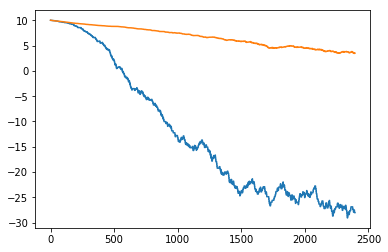

In [541]:
plt.plot(q_0_0)
plt.plot(q_0_1)

In [542]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化

state = 0
action = sarsa_policy_1(state)
for episode in range(3000):
    next_state = grid_transition[state][action]
    if next_state is None:
        state = 0
        action = sarsa_policy_1(state)
        continue

    next_action = sarsa_policy_1(state)
    
    update(state, action, next_state, next_action)
    state = next_state
    action = next_action

print(q_table)

[[-42.300  3.319]
 [-7.973  9.141]
 [ 12.956 -127.243]
 [ 10.000  10.000]]


([<matplotlib.axis.YTick at 0x11fee61d0>,
 <a list of 2 Text yticklabel objects>)

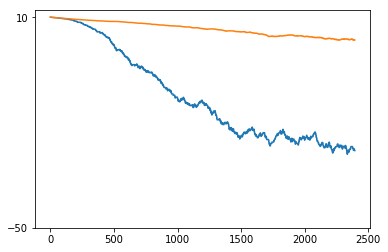

In [543]:
plt.plot(q_0_0)
plt.plot(q_0_1)
plt.yticks([10, -50])

# Q-learning

$$
Q(S_t, A_t) \gets (1 - \alpha) Q(S_t, A_t) + \alpha(R_{t+1} \gamma \max_{a' \in A(s'_{t+1})} Q(S_{t+1}, a'))
$$

Q-learningは行動価値を上記のように更新する学習方法である。状態遷移確率が入ってこないため、環境が未知である場合にも計算することができます。

Sarsaとの違いとして、遷移後の行動選択についての確率は含まれず、常に最大の行動価値を目標値として更新する。


$$
Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha(R_{t+1} + \gamma \max_{a' \in A(s'_{t+1})} Q(S_{t+1}, a') - Q(S_t, A_t))
$$

TD誤差のところ $\alpha(R_{t+1} + \gamma \max_{a' \in A(s'_{t+1})} Q(S_{t+1}, a') - Q(S_t, A_t))$

の、$\gamma \max_{a' \in A(s'_{t+1})} Q(S_{t+1}, a') $　の $Q(S_{t+1}, a')$ の $a'$

なぜ$a'$なのか？？？ $A_{t+1}$でいいのでは？

とりあえず、これもてきとーに組んでみましょう

In [544]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化
q_table

array([[ 10.000,  10.000],
       [ 10.000,  10.000],
       [ 10.000,  10.000],
       [ 10.000,  10.000]])

In [545]:
state = 0
action = 0
gamma = 0.8

next_state = 2
next_action = 0

# update式
(1 - lr) * q_table[state, action] + lr * (r(state, action) + gamma * np.argmax(q_table[next_state]))

9.9000000000000004

In [546]:
def update(state, action, next_state):
    global q_table
    q_table[state, action] = (1 - lr) * q_table[state, action] + lr * (r(state, action) + gamma * np.argmax(q_table[next_state]))

In [551]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化

state = 0
probas = policy_1()
action = np.random.choice(actions, p=probas)
q_0_0 = []
q_0_1 = []
for episode in range(3000):
    next_state = grid_transition[state][action]
    if next_state is None:
        state = np.random.choice(state)
        action = np.random.choice(actions, p=probas)
        continue

    next_action = np.random.choice(actions, p=probas)
    q_0_0.append(q_table[0, 0])
    q_0_1.append(q_table[0, 1])
    
    update(state, action, next_state)
    state = next_state
    action = next_action

print(q_table)

[[ 0.089  1.873]
 [ 0.202  1.272]
 [ 5.164 -96.756]
 [ 10.000  10.000]]


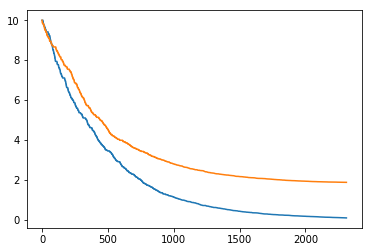

In [552]:
plt.plot(q_0_0)
plt.plot(q_0_1)

In [549]:
q_table = np.zeros(np.array(grid_transition).shape)
q_table[:]  = 10  # Q関数の値を10で初期化

state = 0
probas = policy_2()
action = np.random.choice(actions, p=probas)
q_0_0 = []
q_0_1 = []
for episode in range(3000):
    next_state = grid_transition[state][action]
    if next_state is None:
        state = np.random.choice(state)
        action = np.random.choice(actions, p=probas)
        continue

    next_action = np.random.choice(actions, p=probas)
    q_0_0.append(q_table[0, 0])
    q_0_1.append(q_table[0, 1])
    
    update(state, action, next_state)
    state = next_state
    action = next_action

print(q_table)

[[ 0.011  7.866]
 [ 0.152  8.819]
 [ 5.000 -34.448]
 [ 10.000  10.000]]


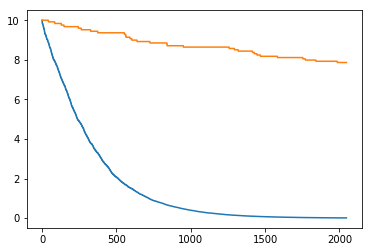

In [550]:
plt.plot(q_0_0)
plt.plot(q_0_1)

In [ ]:
`